In [1]:
import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict

from PIL import Image, ImageDraw

In [2]:
cc = np.array([[1000 == np.round((x - 50)**2 + (y - 50)**2) for y in range(0, 101)] for x in range(0, 101)]).astype(np.uint8)

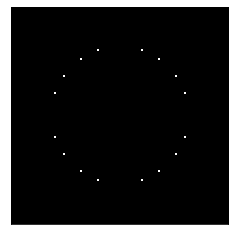

In [3]:
plt.imshow(cc, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [39]:
steps = 101
points = []

In [50]:
for rr in range(20, 61):
    for t in range(steps):
        points.append((rr, int(rr * np.cos(2 * np.pi * t / steps)), int(rr * np.sin(2 * np.pi * t / steps))))

In [51]:
xyr = np.zeros([101,101,101])

In [52]:
pts = np.array(points)

In [53]:
acc = defaultdict(int)

In [54]:
for cx in np.arange(101):
    for cy in np.arange(101):
        if cc[cx, cy] > 0:    
            for r, x, y in points:
                if ((x + cx) > 99) or ((x + cx) < 0): continue
                if ((y + cy) > 99) or ((y + cy) < 0): continue
                xyr[x + cx, y + cy, r] += 1
                acc[(x + cx, y + cy, r)] += 1

In [55]:
xyr.shape

(101, 101, 101)

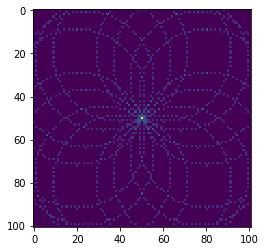

In [56]:
plt.imshow(xyr[:, :, 32])

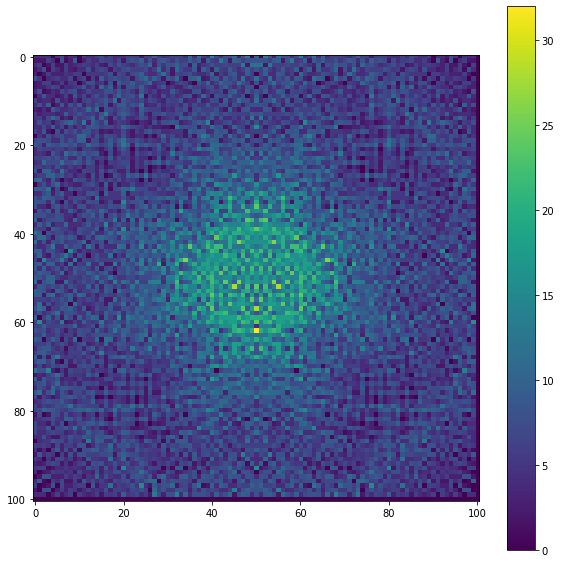

In [57]:
fig = plt.figure(figsize=(10,10))
plt.imshow(xyr.sum(axis=2))
plt.colorbar()

In [58]:
threshold = 0.01

In [59]:
circles = []
for k, v in sorted(acc.items(), key=lambda i: -i[1]):
#     print(k, v)
    x, y, r = k
    if v / steps >= threshold and all((x - xc) ** 2 + (y - yc) ** 2 > rc ** 2 for xc, yc, rc in circles):
        print(v / steps, x, y, r)
        circles.append((x, y, r))

0.15841584158415842 50 50 32
0.07920792079207921 20 20 21
0.07920792079207921 20 80 21
0.039603960396039604 9 56 20
0.039603960396039604 0 27 25
0.039603960396039604 45 17 35
0.039603960396039604 3 2 42
0.039603960396039604 45 83 35
0.039603960396039604 5 95 39
0.039603960396039604 81 27 42
0.039603960396039604 81 73 42


In [362]:
input_image = Image.fromarray(np.uint8(cc*255))

In [363]:
output_image = Image.new("RGB", input_image.size)
output_image.paste(input_image)
draw_result = ImageDraw.Draw(output_image)

In [364]:
for x, y, r in circles:
    draw_result.ellipse((x-r, y-r, x+r, y+r), outline=(255,0,0,0))

In [365]:
output_image.save("../images/test_51.png")